# Análisis de Taquerías en CDMX con Regresión Lineal

Este Notebook realiza un análisis de taquerías de la Ciudad de México usando un archivo CSV con información como nombre, dirección, número de calificaciones, rating, nivel de precio, extriado de la API de Google Maps

Se limpia el conjunto de datos, se filtra para evitar valores extremos y se ejecuta una regresión lineal para ver si el número de opiniones influye en la calificación promedio.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Cargar el archivo CSV y seleccionar columnas importantes

In [57]:
# Leer el archivo limpio y ya ordenado
df = pd.read_csv("tacos_CDMX_sorted.csv")

# Seleccionar columnas útiles
dfCompleto = df[['name','address', 'userRatingCount','rating', 'priceLevel', 'website', 'lat', 'lng']]
print("Columnas disponibles:", dfCompleto.columns.tolist())
dfCompleto.head()

Columnas disponibles: ['name', 'address', 'userRatingCount', 'rating', 'priceLevel', 'website', 'lat', 'lng']


,name,address,userRatingCount,rating,priceLevel,website,lat,lng
0,El Borrego Viudo,"Av. Revolución 241, Tacubaya, Miguel Hidalgo, ...",42580.0,4.2,PRICE_LEVEL_MODERATE,http://www.taqueriaelborregoviudo.mx/,19.399414,-99.185237
1,Tortas Gigantes Sur 12,"Av Sur 12 277, Agrícola Oriental, Iztacalco, 0...",33015.0,4.3,PRICE_LEVEL_MODERATE,NaN,19.397021,-99.071904
2,Los Especiales,"Av Francisco I. Madero 71, Centro Histórico de...",23855.0,4.3,PRICE_LEVEL_INEXPENSIVE,NaN,19.433159,-99.134590
3,Taquerías el Fogón,"Av. Dr. Gustavo Baz 193B, El Mirador, 54080 Tl...",23473.0,4.5,PRICE_LEVEL_MODERATE,NaN,19.516865,-99.214758
4,"Pa’Tacos ""El Papi""","Ote 91 3229, Mártires de Río Blanco, Gustavo A...",19153.0,4.5,PRICE_LEVEL_INEXPENSIVE,https://www.facebook.com/Tacos-El-Papi-2173667...,19.460556,-99.111338


## Filtrar taquerías con datos útiles para análisis de rating


In [58]:
# Copiar solo las columnas necesarias
dfUserRatingCount = dfCompleto[['name', 'userRatingCount', 'rating','address','priceLevel', 'website']].copy()
dfUserRatingCount = dfUserRatingCount.sort_values(by='userRatingCount', ascending=False)
print("Media de rating:", dfUserRatingCount['rating'].mean())
dfUserRatingCount

Media de rating: 4.436426116838488


,name,userRatingCount,rating,address,priceLevel,website
0,El Borrego Viudo,42580.0,4.2,"Av. Revolución 241, Tacubaya, Miguel Hidalgo, ...",PRICE_LEVEL_MODERATE,http://www.taqueriaelborregoviudo.mx/
1,Tortas Gigantes Sur 12,33015.0,4.3,"Av Sur 12 277, Agrícola Oriental, Iztacalco, 0...",PRICE_LEVEL_MODERATE,NaN
2,Los Especiales,23855.0,4.3,"Av Francisco I. Madero 71, Centro Histórico de...",PRICE_LEVEL_INEXPENSIVE,NaN
3,Taquerías el Fogón,23473.0,4.5,"Av. Dr. Gustavo Baz 193B, El Mirador, 54080 Tl...",PRICE_LEVEL_MODERATE,NaN
4,"Pa’Tacos ""El Papi""",19153.0,4.5,"Ote 91 3229, Mártires de Río Blanco, Gustavo A...",PRICE_LEVEL_INEXPENSIVE,https://www.facebook.com/Tacos-El-Papi-2173667...
...,...,...,...,...,...,...
3120,Tacos el monkiki,NaN,NaN,"Av. Acueducto 126, San Pedro Zacatenco, Gustav...",NaN,NaN
3121,Tacos Los Castigados,NaN,NaN,"Lic. Benito Juárez 4-local 4d, San Juan Ixhuat...",NaN,NaN
3122,Tacos de guisado Dani,NaN,NaN,"Av. Enrique Torres Calderón 129, El Risco CTM,...",NaN,NaN
3123,Tacos De Guisado,NaN,NaN,"Manzana 013, Jardines del Tepeyac, 55220 Ecate...",NaN,NaN


### Limpieza avanzada:
- Solo ratings válidos
- Al menos 10 opiniones
- Sin ratings perfectos (5.0) o muy bajos (1.0)

In [59]:
dfFiltrado = dfUserRatingCount.dropna(subset=['rating'])
dfFiltrado = dfFiltrado[dfFiltrado['userRatingCount'] >= 100]
dfFiltrado = dfFiltrado[(dfFiltrado['rating'] != 5.0) & (dfFiltrado['rating'] != 1.0)]
print("Taquerías con calificaciones realistas:", dfFiltrado.shape[0])
print("Media filtrada:", dfFiltrado['rating'].mean())

Taquerías con calificaciones realistas: 1079
Media filtrada: 4.360426320667284


### Regresión Lineal: ¿el número de opiniones predice la calificación?

Coeficiente (pendiente): -7.084205281924947e-06
Intercepto: 4.370576378281796


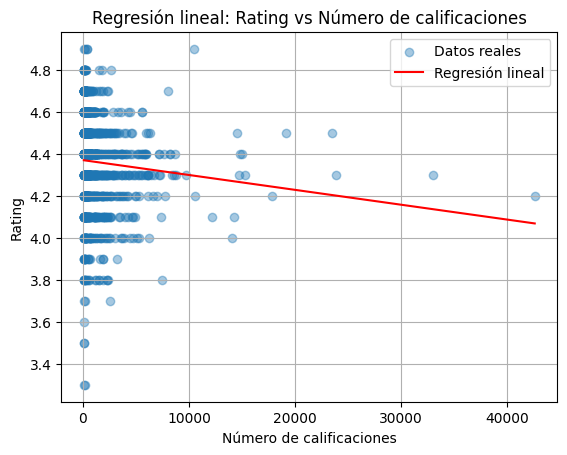

In [68]:
# Extraer los datos
X = dfFiltrado['userRatingCount'].values
y = dfFiltrado['rating'].values

# Calcular la pendiente (m) y el intercepto (b) de la recta: y = mX + b
m, b = np.polyfit(X, y, 1)  # Regresión lineal de grado 1

# Predicción
y_pred = m * X + b

# Imprimir coeficientes
print("Coeficiente (pendiente):", m)
print("Intercepto:", b)

# Gráfica
plt.scatter(X, y, alpha=0.4, label='Datos reales')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.xlabel('Número de calificaciones')
plt.ylabel('Rating')
plt.title('Regresión lineal: Rating vs Número de calificaciones')
plt.legend()
plt.grid(True)
plt.show()

##### Pendiente: -0.000010067
Es un número negativo muy pequeño, lo que significa que a medida que aumentan las opiniones, el rating tiende a bajar ligeramente.

Por cada 1,000 opiniones nuevas, el rating promedio bajaría solo 0.010067 puntos. Aun con 10,000 calificaciones solo bajaria una decima

### Gráfica de dispersión con línea de regresión

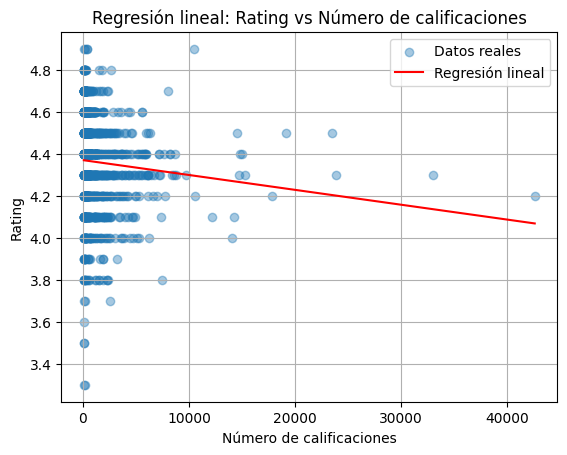

In [69]:
plt.scatter(X, y, alpha=0.4, label='Datos reales')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.xlabel('Número de calificaciones')
plt.ylabel('Rating')
plt.title('Regresión lineal: Rating vs Número de calificaciones')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
# mostrar las taquerias con mas de 10,000 calificaciones
dfTopCalificaciones = dfFiltrado[dfFiltrado['userRatingCount'] > 5000] 
print(dfTopCalificaciones)


                          name  userRatingCount  rating  \
0             El Borrego Viudo          42580.0     4.2   
1       Tortas Gigantes Sur 12          33015.0     4.3   
2               Los Especiales          23855.0     4.3   
3           Taquerías el Fogón          23473.0     4.5   
4           Pa’Tacos "El Papi"          19153.0     4.5   
..                         ...              ...     ...   
61                    El Turix           5272.0     4.3   
62            Taquería Orinoco           5249.0     4.4   
63   Tacos La Chula Revolución           5182.0     4.3   
64                   Taco Naco           5148.0     4.0   
65  La Terraza Palacio Perisur           5087.0     4.4   

                                              address  \
0   Av. Revolución 241, Tacubaya, Miguel Hidalgo, ...   
1   Av Sur 12 277, Agrícola Oriental, Iztacalco, 0...   
2   Av Francisco I. Madero 71, Centro Histórico de...   
3   Av. Dr. Gustavo Baz 193B, El Mirador, 54080 Tl...   
4   Ot

In [71]:
# de las de mas de 5,000 calificaciones, mostrar las 10 con mejor rating
dfTopRating = dfTopCalificaciones.nlargest(10, 'rating')
print("Las 10 taquerías con más de 5,000 calificaciones y mejor rating:")
print(dfTopRating[['name', 'userRatingCount', 'rating', 'address']])

Las 10 taquerías con más de 5,000 calificaciones y mejor rating:
                              name  userRatingCount  rating  \
15                        Mochomos          10499.0     4.9   
23              Taquería Don Frank           8048.0     4.7   
53         Cantina La 20 | Polanco           5616.0     4.6   
54              Taquería Don Frank           5601.0     4.6   
3               Taquerías el Fogón          23473.0     4.5   
4               Pa’Tacos "El Papi"          19153.0     4.5   
10                Taquería Orinoco          14508.0     4.5   
36  Taquería Pepe Coyotes Coyoacán           6332.0     4.5   
41                Taquería Orinoco           6133.0     4.5   
45                 Tacos La Morena           5969.0     4.5   

                                              address  
15  Av. Paseo de las Palmas 781, Lomas de Chapulte...  
23  Monterrey 370, Roma Sur, Cuauhtémoc, 06760 Ciu...  
53  Andrés Bello 10, Polanco, Polanco IV Secc, Mig...  
54  Eje 6 Sur 258

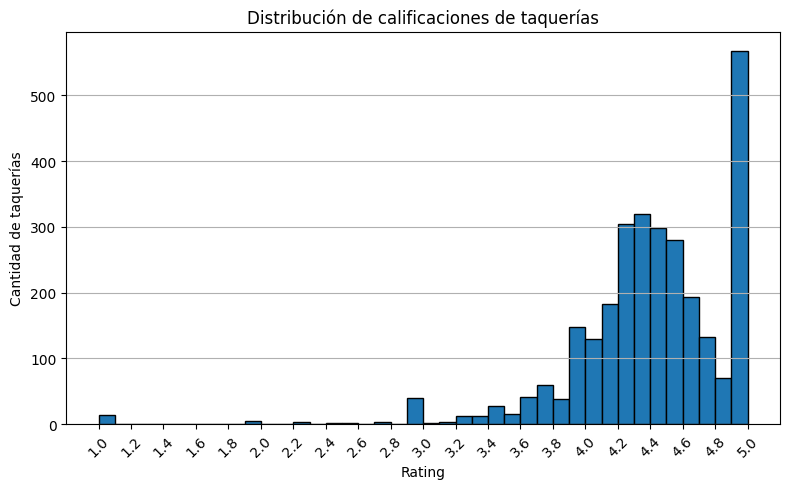

In [72]:
import matplotlib.pyplot as plt

# Histograma de ratings con bin de 0.2
plt.figure(figsize=(8,5))
plt.hist(df['rating'].dropna(), bins=np.arange(1.0, 5.1, 0.1), edgecolor='black')

plt.title('Distribución de calificaciones de taquerías')
plt.xlabel('Rating')
plt.ylabel('Cantidad de taquerías')
plt.grid(axis='y')
plt.xticks(np.arange(1.0, 5.1, 0.2), rotation=45)
plt.tight_layout()
plt.show()

In [73]:
df_rating = dfFiltrado[['rating', 'userRatingCount']].copy()
df_rating

,rating,userRatingCount
0,4.2,42580.0
1,4.3,33015.0
2,4.3,23855.0
3,4.5,23473.0
4,4.5,19153.0
...,...,...
1074,4.4,101.0
1076,4.4,101.0
1079,4.7,100.0
1077,4.8,100.0


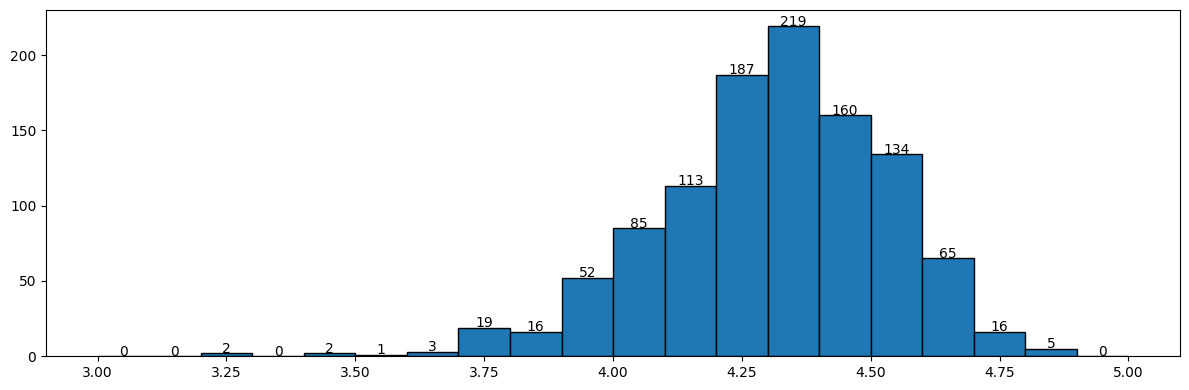

In [74]:


plt.figure(figsize=(12, 4))
cuentas, bins, patches = plt.hist(dfFiltrado['rating'], bins=np.arange(3, 5.1, 0.1), edgecolor='black')

# Agregar número de elementos encima de cada barra
for i in range(len(cuentas)):
    x = (bins[i] + bins[i+1]) / 2
    y = cuentas[i]
    plt.text(x, y + 0.5, str(int(y)), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [75]:
conteo_rating = df['rating'].value_counts().sort_index()
conteo_rating

rating
1.0     14
1.4      1
1.5      1
2.0      5
2.1      1
2.2      1
2.3      4
2.5      2
2.6      2
2.7      1
2.8      3
2.9      1
3.0     40
3.1      2
3.2      3
3.3     12
3.4     12
3.5     27
3.6     16
3.7     41
3.8     59
3.9     39
4.0    147
4.1    129
4.2    182
4.3    305
4.4    319
4.5    298
4.6    280
4.7    193
4.8    132
4.9     70
5.0    568
Name: count, dtype: int64